In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
data=pd.read_csv('city_day_new.csv')

In [3]:
cols=['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

X=data[cols]
y=data['AQI_bucket_calculated']

In [4]:
y.value_counts()

2    10639
1     9079
3     2979
4     2420
5     1595
0     1445
Name: AQI_bucket_calculated, dtype: int64

# Undersampling (Neigbourhood Cleaning Rule)

In [5]:
from imblearn.under_sampling import NeighbourhoodCleaningRule 
ncr = NeighbourhoodCleaningRule(n_neighbors=5, threshold_cleaning=0.5) 

In [6]:
X_ncr, y_ncr =ncr.fit_resample(X,y)

In [7]:
y_ncr.value_counts()

2    8705
1    7598
3    1759
4    1716
0    1445
5    1301
Name: AQI_bucket_calculated, dtype: int64

# Testing Model After Undersampling

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_ncr,y_ncr,test_size=0.40,random_state=42)

# 1.Naive Bayes After Undersampling(NCR)

In [9]:
from sklearn.naive_bayes import GaussianNB
nb_ncr_model = GaussianNB()

nb_ncr_model.fit(X_train,y_train)

y_pred_ncr = nb_ncr_model.predict(X_test)

# predict probabilities
nb_ncr_pred_prob = nb_ncr_model.predict_proba(X_test)

In [10]:
from sklearn import metrics
acc_score_nb_afterus=metrics.accuracy_score(y_test, y_pred_ncr)
f1_score_nb_afterus=metrics.f1_score(y_test, y_pred_ncr,average='weighted')
precision_nb_afterus=metrics.precision_score(y_test, y_pred_ncr,average='weighted')
recall_nb_afterus=metrics.recall_score(y_test, y_pred_ncr,average='weighted')

print("Accuracy:",acc_score_nb_afterus.round(4))
print("Weighted F1 Score:",f1_score_nb_afterus.round(4))
print("Weighted Precision:",precision_nb_afterus.round(4))
print("Weighted Recall:",recall_nb_afterus.round(4))

Accuracy: 0.7326
Weighted F1 Score: 0.7351
Weighted Precision: 0.7537
Weighted Recall: 0.7326


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_ncr))
print(classification_report(y_test, y_pred_ncr))

[[ 274  224   22    0    0    3]
 [ 266 2555  217   33    0    8]
 [  53  772 2312  281   16   36]
 [   0    0  111  549   50    9]
 [   0    2   16  153  459   41]
 [   0    0    0    8   88  452]]
              precision    recall  f1-score   support

           0       0.46      0.52      0.49       523
           1       0.72      0.83      0.77      3079
           2       0.86      0.67      0.75      3470
           3       0.54      0.76      0.63       719
           4       0.75      0.68      0.71       671
           5       0.82      0.82      0.82       548

    accuracy                           0.73      9010
   macro avg       0.69      0.72      0.70      9010
weighted avg       0.75      0.73      0.74      9010



In [12]:
CM = confusion_matrix(y_test, y_pred_ncr)

FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('TPR:',TPR.round(4))
print('FPR:',FPR.round(4))
print('ACC:',ACC.round(4))

TPR: [0.5239 0.8298 0.6663 0.7636 0.6841 0.8248]
FPR: [0.0376 0.1683 0.0661 0.0573 0.0185 0.0115]
ACC: [0.937  0.8311 0.8309 0.9284 0.9594 0.9786]


ROC_AUC Score: 0.9345028626709193


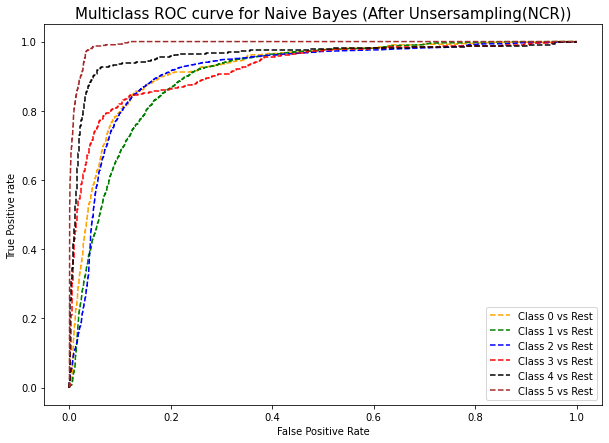

In [13]:
# roc curve for classes
plt.figure(figsize=(10,7))

fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, nb_ncr_pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='brown', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Naive Bayes (After Unsersampling(NCR))',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

print('ROC_AUC Score:',roc_auc_score(y_test, nb_ncr_pred_prob,multi_class='ovr'))

# 2. KNN After Undersampling(NCR)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_ncr_model = KNeighborsClassifier(n_neighbors=5)
knn_ncr_model.fit(X_train, y_train)

y_pred_ncr = knn_ncr_model.predict(X_test)

# predict probabilities
knn_ncr_pred_prob = knn_ncr_model.predict_proba(X_test)

In [15]:
acc_score_knn_afterus=metrics.accuracy_score(y_test, y_pred_ncr)
f1_score_knn_afterus=metrics.f1_score(y_test, y_pred_ncr,average='weighted')
precision_knn_afterus=metrics.precision_score(y_test, y_pred_ncr,average='weighted')
recall_knn_afterus=metrics.recall_score(y_test, y_pred_ncr,average='weighted')

print("Accuracy:",acc_score_knn_afterus.round(4))
print("Weighted F1 Score:",f1_score_knn_afterus.round(4))
print("Weighted Precision:",precision_knn_afterus.round(4))
print("Weighted Recall:",recall_knn_afterus.round(4))

Accuracy: 0.927
Weighted F1 Score: 0.9259
Weighted Precision: 0.9264
Weighted Recall: 0.927


In [16]:
print(confusion_matrix(y_test, y_pred_ncr))
print(classification_report(y_test, y_pred_ncr))

[[ 352  156   14    1    0    0]
 [  57 2938   81    2    1    0]
 [   6  150 3283   28    2    1]
 [   0    2   80  623   11    3]
 [   0    0    0   30  629   12]
 [   0    0    0    1   20  527]]
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       523
           1       0.91      0.95      0.93      3079
           2       0.95      0.95      0.95      3470
           3       0.91      0.87      0.89       719
           4       0.95      0.94      0.94       671
           5       0.97      0.96      0.97       548

    accuracy                           0.93      9010
   macro avg       0.92      0.89      0.90      9010
weighted avg       0.93      0.93      0.93      9010



In [17]:
CM = confusion_matrix(y_test, y_pred_ncr)

FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('TPR:',TPR.round(4))
print('FPR:',FPR.round(4))
print('ACC:',ACC.round(4))

TPR: [0.673  0.9542 0.9461 0.8665 0.9374 0.9617]
FPR: [0.0074 0.0519 0.0316 0.0075 0.0041 0.0019]
ACC: [0.974  0.9502 0.9598 0.9825 0.9916 0.9959]


ROC_AUC Score: 0.9796062701297749


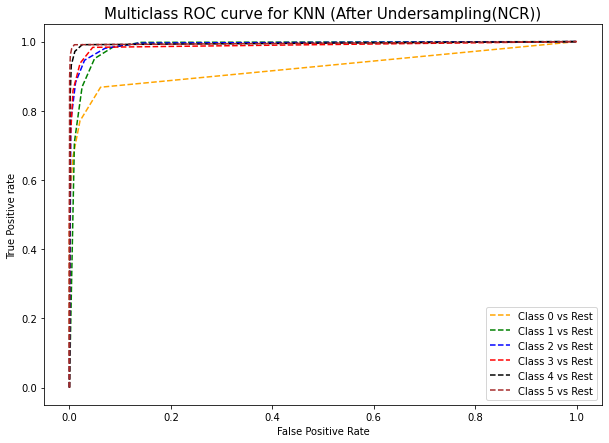

In [18]:
# roc curve for classes
plt.figure(figsize=(10,7))

fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, knn_ncr_pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='brown', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN (After Undersampling(NCR))',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

print('ROC_AUC Score:',roc_auc_score(y_test, knn_ncr_pred_prob,multi_class='ovr'))

In [19]:
df_acc=pd.read_csv('analysis1.csv')
df_f1=pd.read_csv('analysis2.csv')
df_pre=pd.read_csv('analysis3.csv')
df_recall=pd.read_csv('analysis4.csv')

In [20]:
acc=[acc_score_nb_afterus.round(4),acc_score_knn_afterus.round(4)]
f1=[f1_score_nb_afterus.round(4),f1_score_knn_afterus.round(4)]
pre=[precision_nb_afterus.round(4),precision_knn_afterus.round(4)]
recall=[recall_nb_afterus.round(4),recall_knn_afterus.round(4)]

df_acc['Undersampling(NCR)Accuracy']=acc
df_f1['Undersampling(NCR)f1 score']=f1
df_pre['Undersampling(NCR)precision']=pre
df_recall['Undersampling(NCR)recall']=recall

df_acc.drop('Unnamed: 0',axis=1,inplace=True)
df_f1.drop('Unnamed: 0',axis=1,inplace=True)
df_pre.drop('Unnamed: 0',axis=1,inplace=True)
df_recall.drop('Unnamed: 0',axis=1,inplace=True)

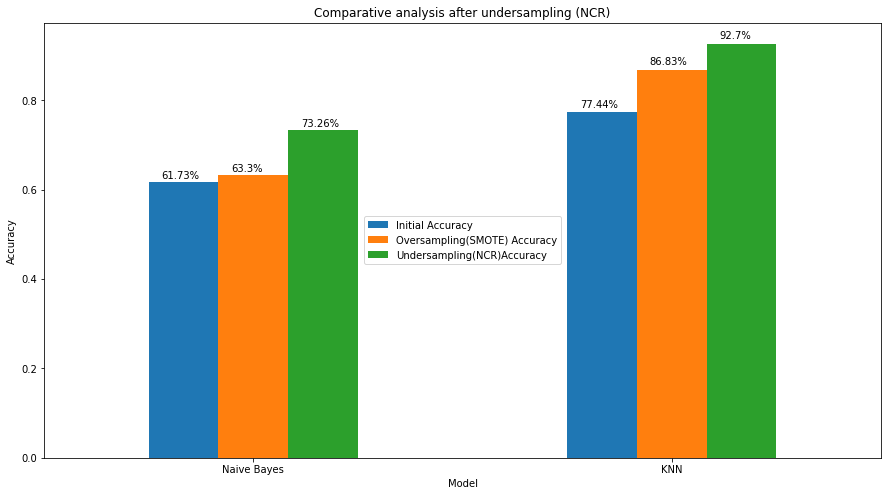

In [21]:
ax = df_acc.plot(x='Model',ylabel="Accuracy",kind='bar',legend=True,figsize=(15,8),title="Comparative analysis after undersampling (NCR)",rot=0)
plt.legend(loc='center')

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.03, i.get_height()*1.013, \
            str(round(i.get_height()*100, 2))+'%')

In [22]:
df_acc.to_csv('analysis1.csv')
df_f1.to_csv('analysis2.csv')
df_pre.to_csv('analysis3.csv')
df_recall.to_csv('analysis4.csv')